# Map of Europe

## Imports

In [167]:
import fsspec
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm


## Get map of the world

In [168]:
with fsspec.open("map/ne_110m_admin_0_countries.zip") as file:
    map_df = gpd.read_file(file)

## Define function for plotting a map

In [169]:
def plot_map(map_df, column, title, bounds=[]):
    if len(bounds)>0:
        norm = BoundaryNorm(bounds, ncolors=plt.cm.viridis.N, clip=True)
    else:
        norm = None
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    map_df.boundary.plot(ax=ax)
    map_df.plot(column=column, ax=ax, legend=True,
                cmap="viridis", norm=norm,
                legend_kwds={'label': "",
                            'orientation': "vertical",
                            "shrink": 0.5,
                            "pad": 0.02,
                            "aspect": 30,
                            "location": "right"
                            })

    # Usunięcie znaczników i wartości z osi
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Ustawienie granic osi dla powiększenia na Europę kontynentalną
    ax.set_xlim(-20, 35)
    ax.set_ylim(30, 75)

    # Ustawienie tytułu
    plt.title(title, fontsize=15)

    # Pokaż mapę
    plt.show()

## Read and clean data

In [170]:
df = pd.read_excel("data\wealth_estimates_2000_2021.xlsx", sheet_name="EU_ordered_18", index_col=1)
df_wealth = df["Wealth per adult_2021"]
wealth_2021 = df_wealth.to_dict()
df_growth = df["Growth 2018-2021"]
growth_2018_2021 = df_growth.to_dict()

## Plot wealth 2021

In [175]:
europe = map_df[map_df["NAME"].isin(wealth_2021.keys())]
europe['wealth_2021'] = europe['NAME'].map(wealth_2021)
europe = europe.dropna(subset=['wealth_2021'])

c:\Users\jarem\python-projects\map-of-europe\.venv\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [176]:
bounds = [0, 25000, 50000, 75000, 100000, 150000, 200000, 300000, 500000]
title = 'Majątek na dorosłego mieszkańca w wybranych państwach UE w 2021 (dol.)'
column = 'wealth_2021'


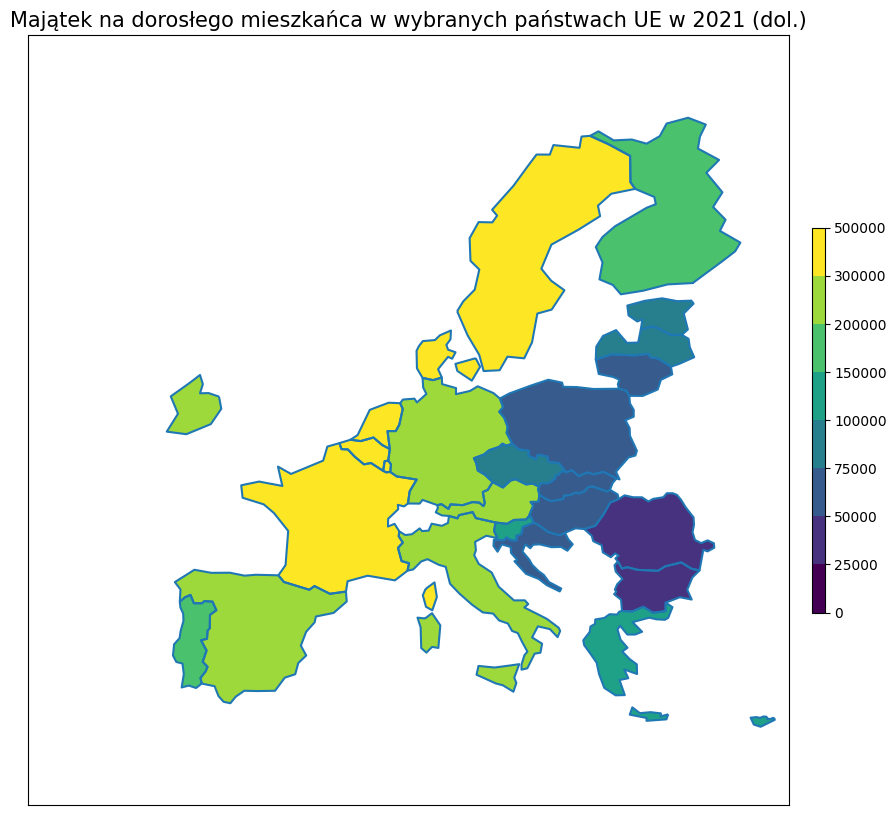

In [177]:
plot_map(europe, column, title, bounds)

## Plot growth

In [178]:
europe = map_df[map_df["NAME"].isin(growth_2018_2021.keys())]
europe['growth_2018_2021'] = europe['NAME'].map(growth_2018_2021)
europe = europe.dropna(subset=['growth_2018_2021'])

c:\Users\jarem\python-projects\map-of-europe\.venv\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [183]:
bounds = [0, 10, 50, 100, 200]
title = 'Wzrost majątku na dorosłego mieszkańca w wybranych państwach UE między 2018 a 2021 (%)'
column = 'growth_2018_2021'

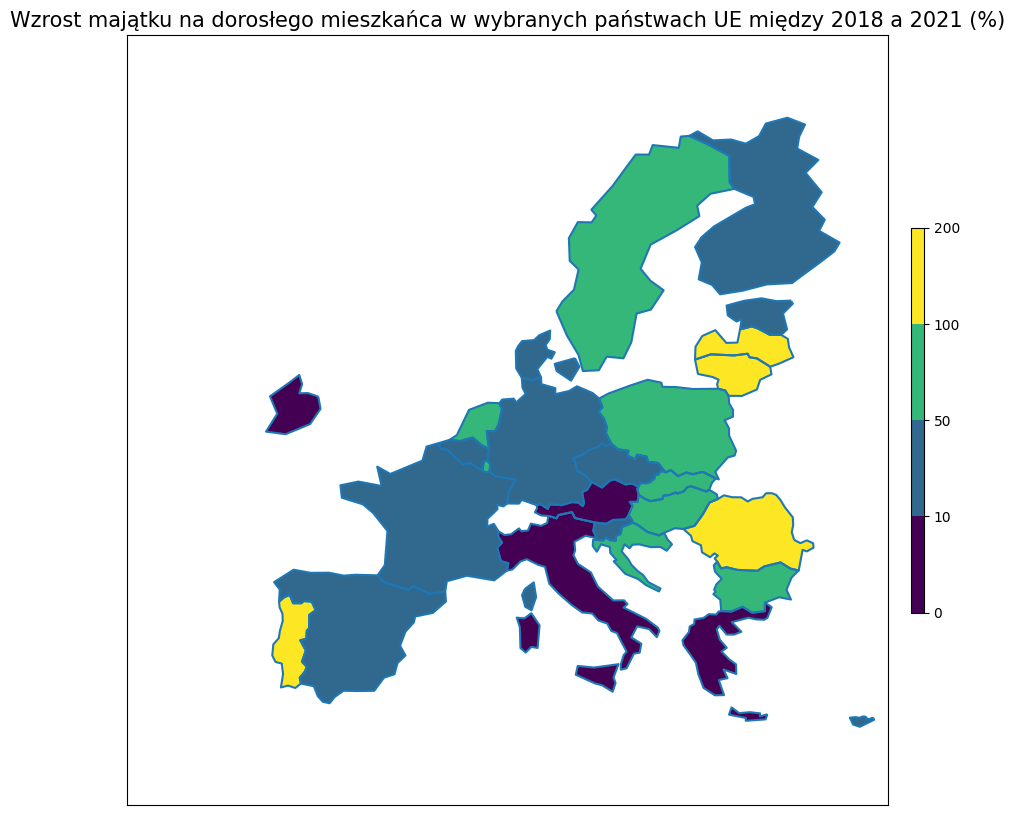

In [184]:
plot_map(europe, column, title, bounds)